In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression 
import math


pd.set_option('display.max_columns', None)
%matplotlib inline 

housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [2]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [3]:
# removing outliers
housing = housing[housing['GrLivArea']< 4000]

In [4]:
numerical_columns = housing.select_dtypes(['int64','float64'])

# Looking at Distribution of the Numerical Columns

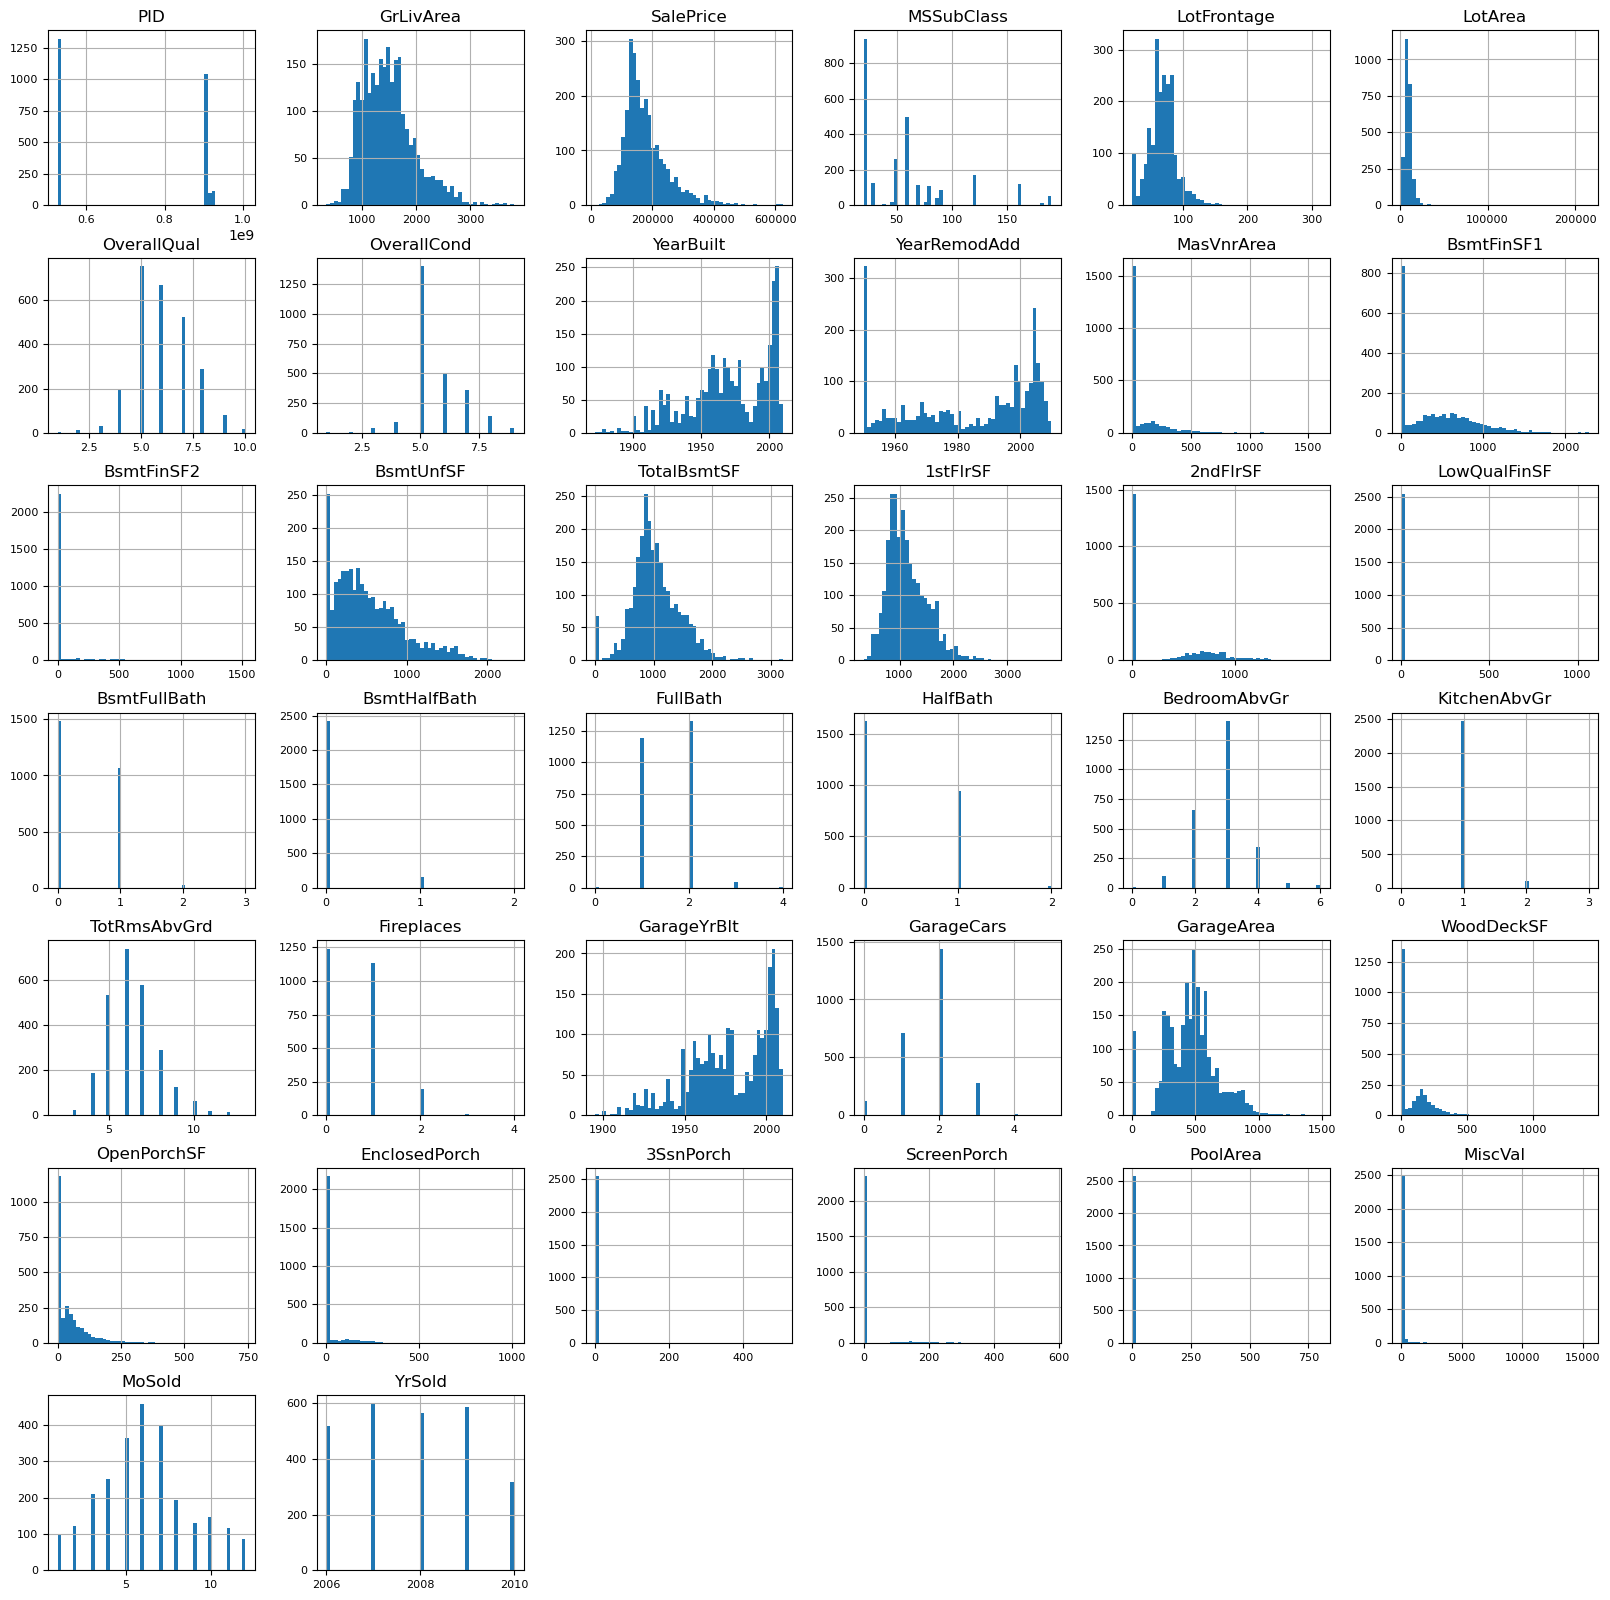

In [5]:
numerical_columns.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [6]:
numerical_columns.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [7]:
cont_num_cols = numerical_columns.drop(['SalePrice','PID','MoSold','MSSubClass','YrSold','FullBath','Fireplaces','OverallQual','OverallCond','HalfBath','TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr','GarageCars','BsmtHalfBath','BsmtFullBath'],axis=1)
cont_num_cols

,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,856,NaN,7890,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1939.0,399.0,0,0,0,0,166,0,0
2,1049,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1984.0,266.0,0,105,0,0,0,0,0
3,1001,60.0,6060,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,1930.0,216.0,154,0,42,86,0,0,0
4,1039,80.0,8146,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,1940.0,281.0,0,0,168,0,111,0,0
5,1665,70.0,8400,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,2001.0,528.0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,NaN,8854,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,1916.0,192.0,0,98,0,0,40,0,0
760,1733,NaN,13680,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,1955.0,452.0,0,0,0,0,0,0,0
761,2002,82.0,6270,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,1949.0,871.0,0,0,0,0,0,0,0
762,1842,NaN,8826,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,2000.0,486.0,193,96,0,0,0,0,0


# Feature vs Sale Price Scatter Plots for Numerical Columns

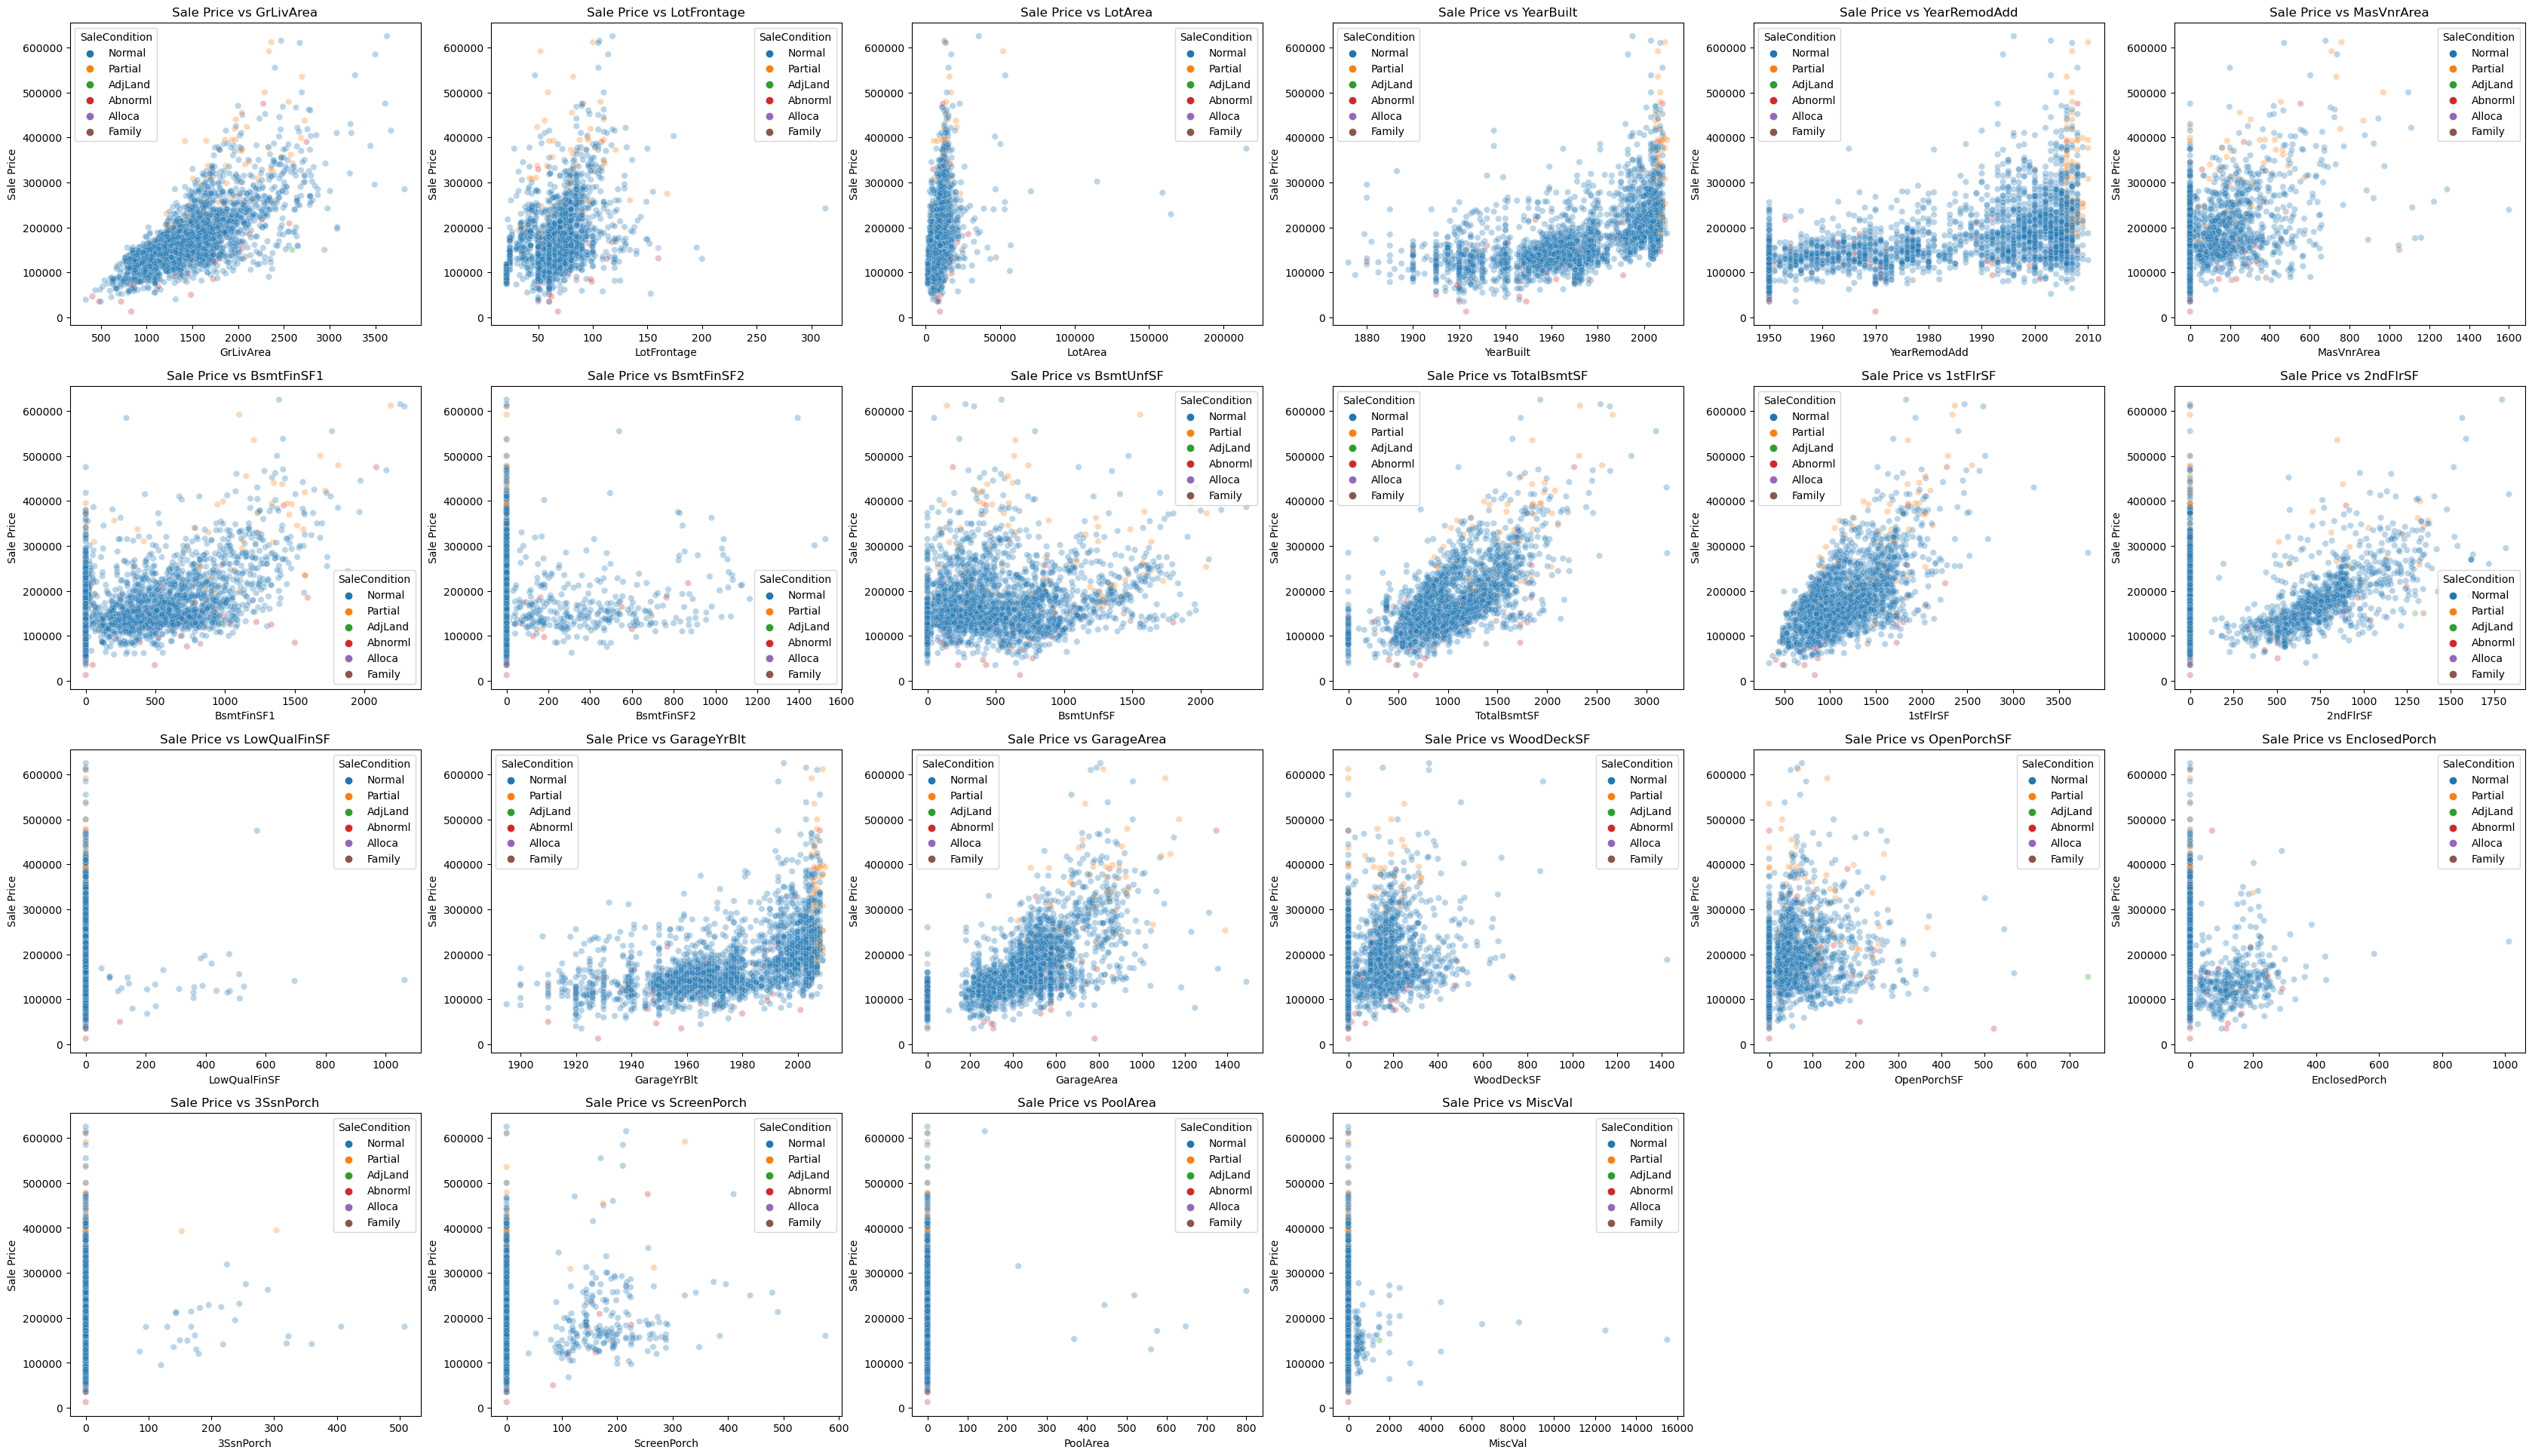

In [8]:
n_cols = 6
n_rows = math.ceil(len(cont_num_cols.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it iterable
for i, column in enumerate(cont_num_cols.columns):
    sns.scatterplot(data=housing, x=column, y='SalePrice', ax=axes[i], alpha = 0.3, hue='SaleCondition')
    axes[i].set_title(f'Sale Price vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sale Price')
    
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

# Feature vs Sale Price Boxplots for Numerical Features

In [9]:
discrete_num_cols = numerical_columns[['MoSold','MSSubClass','YrSold','FullBath','Fireplaces','OverallQual','OverallCond','HalfBath','TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr','GarageCars','BsmtHalfBath','BsmtFullBath']]
discrete_num_cols

,MoSold,MSSubClass,YrSold,FullBath,Fireplaces,OverallQual,OverallCond,HalfBath,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr,GarageCars,BsmtHalfBath,BsmtFullBath
1,3,30,2010,1,1,6,6,0,4,2,1,2.0,0.0,1.0
2,2,120,2009,2,0,5,5,0,5,2,1,1.0,0.0,1.0
3,11,30,2007,1,0,5,9,0,5,2,1,1.0,0.0,0.0
4,5,70,2009,1,0,4,8,0,6,2,1,1.0,0.0,0.0
5,11,60,2009,2,0,8,6,1,6,3,1,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,5,30,2009,1,1,6,6,0,4,2,1,1.0,0.0,0.0
760,6,20,2009,2,1,3,5,0,8,4,1,2.0,0.0,0.0
761,8,90,2007,2,0,5,6,0,8,4,2,3.0,0.0,0.0
762,7,60,2007,2,1,7,5,1,7,3,1,2.0,0.0,1.0


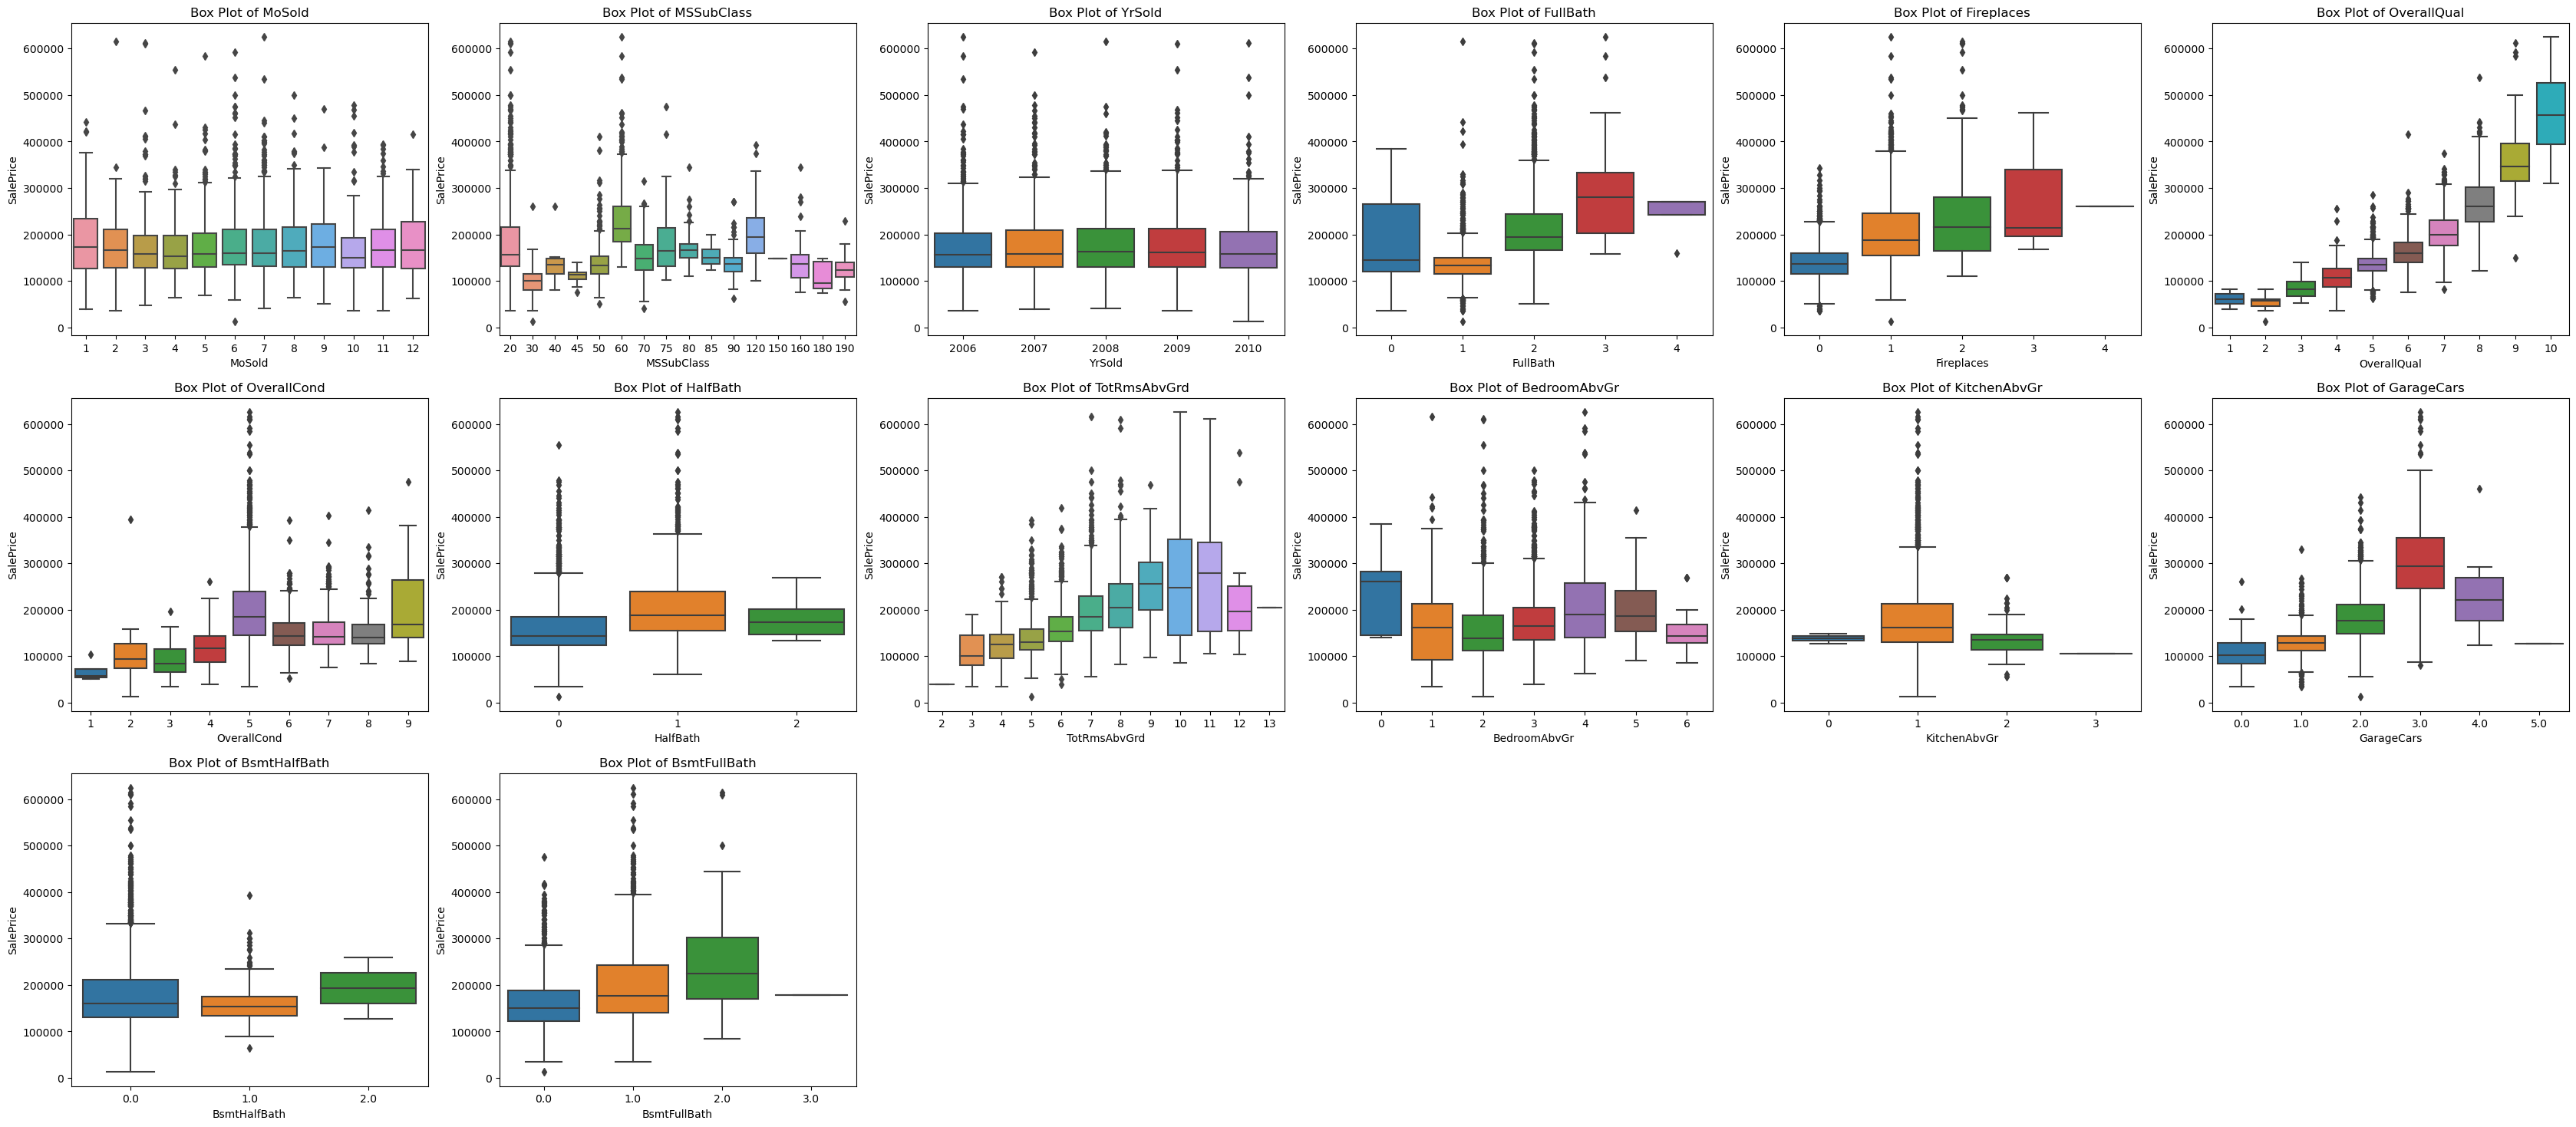

In [18]:
n_cols = 6
n_rows = math.ceil(len(discrete_num_cols.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))

if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it iterable

for i, column in enumerate(discrete_num_cols):
    sns.boxplot(x=numerical_columns[column],y = numerical_columns['SalePrice'], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)
    

# Categorical Columns vs SalePrice Boxplots

In [26]:
categorical_columns = housing.select_dtypes('object')
categorical_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
cat_cols_1 = categorical_columns[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure']]
cat_cols_2 = categorical_columns[['BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]

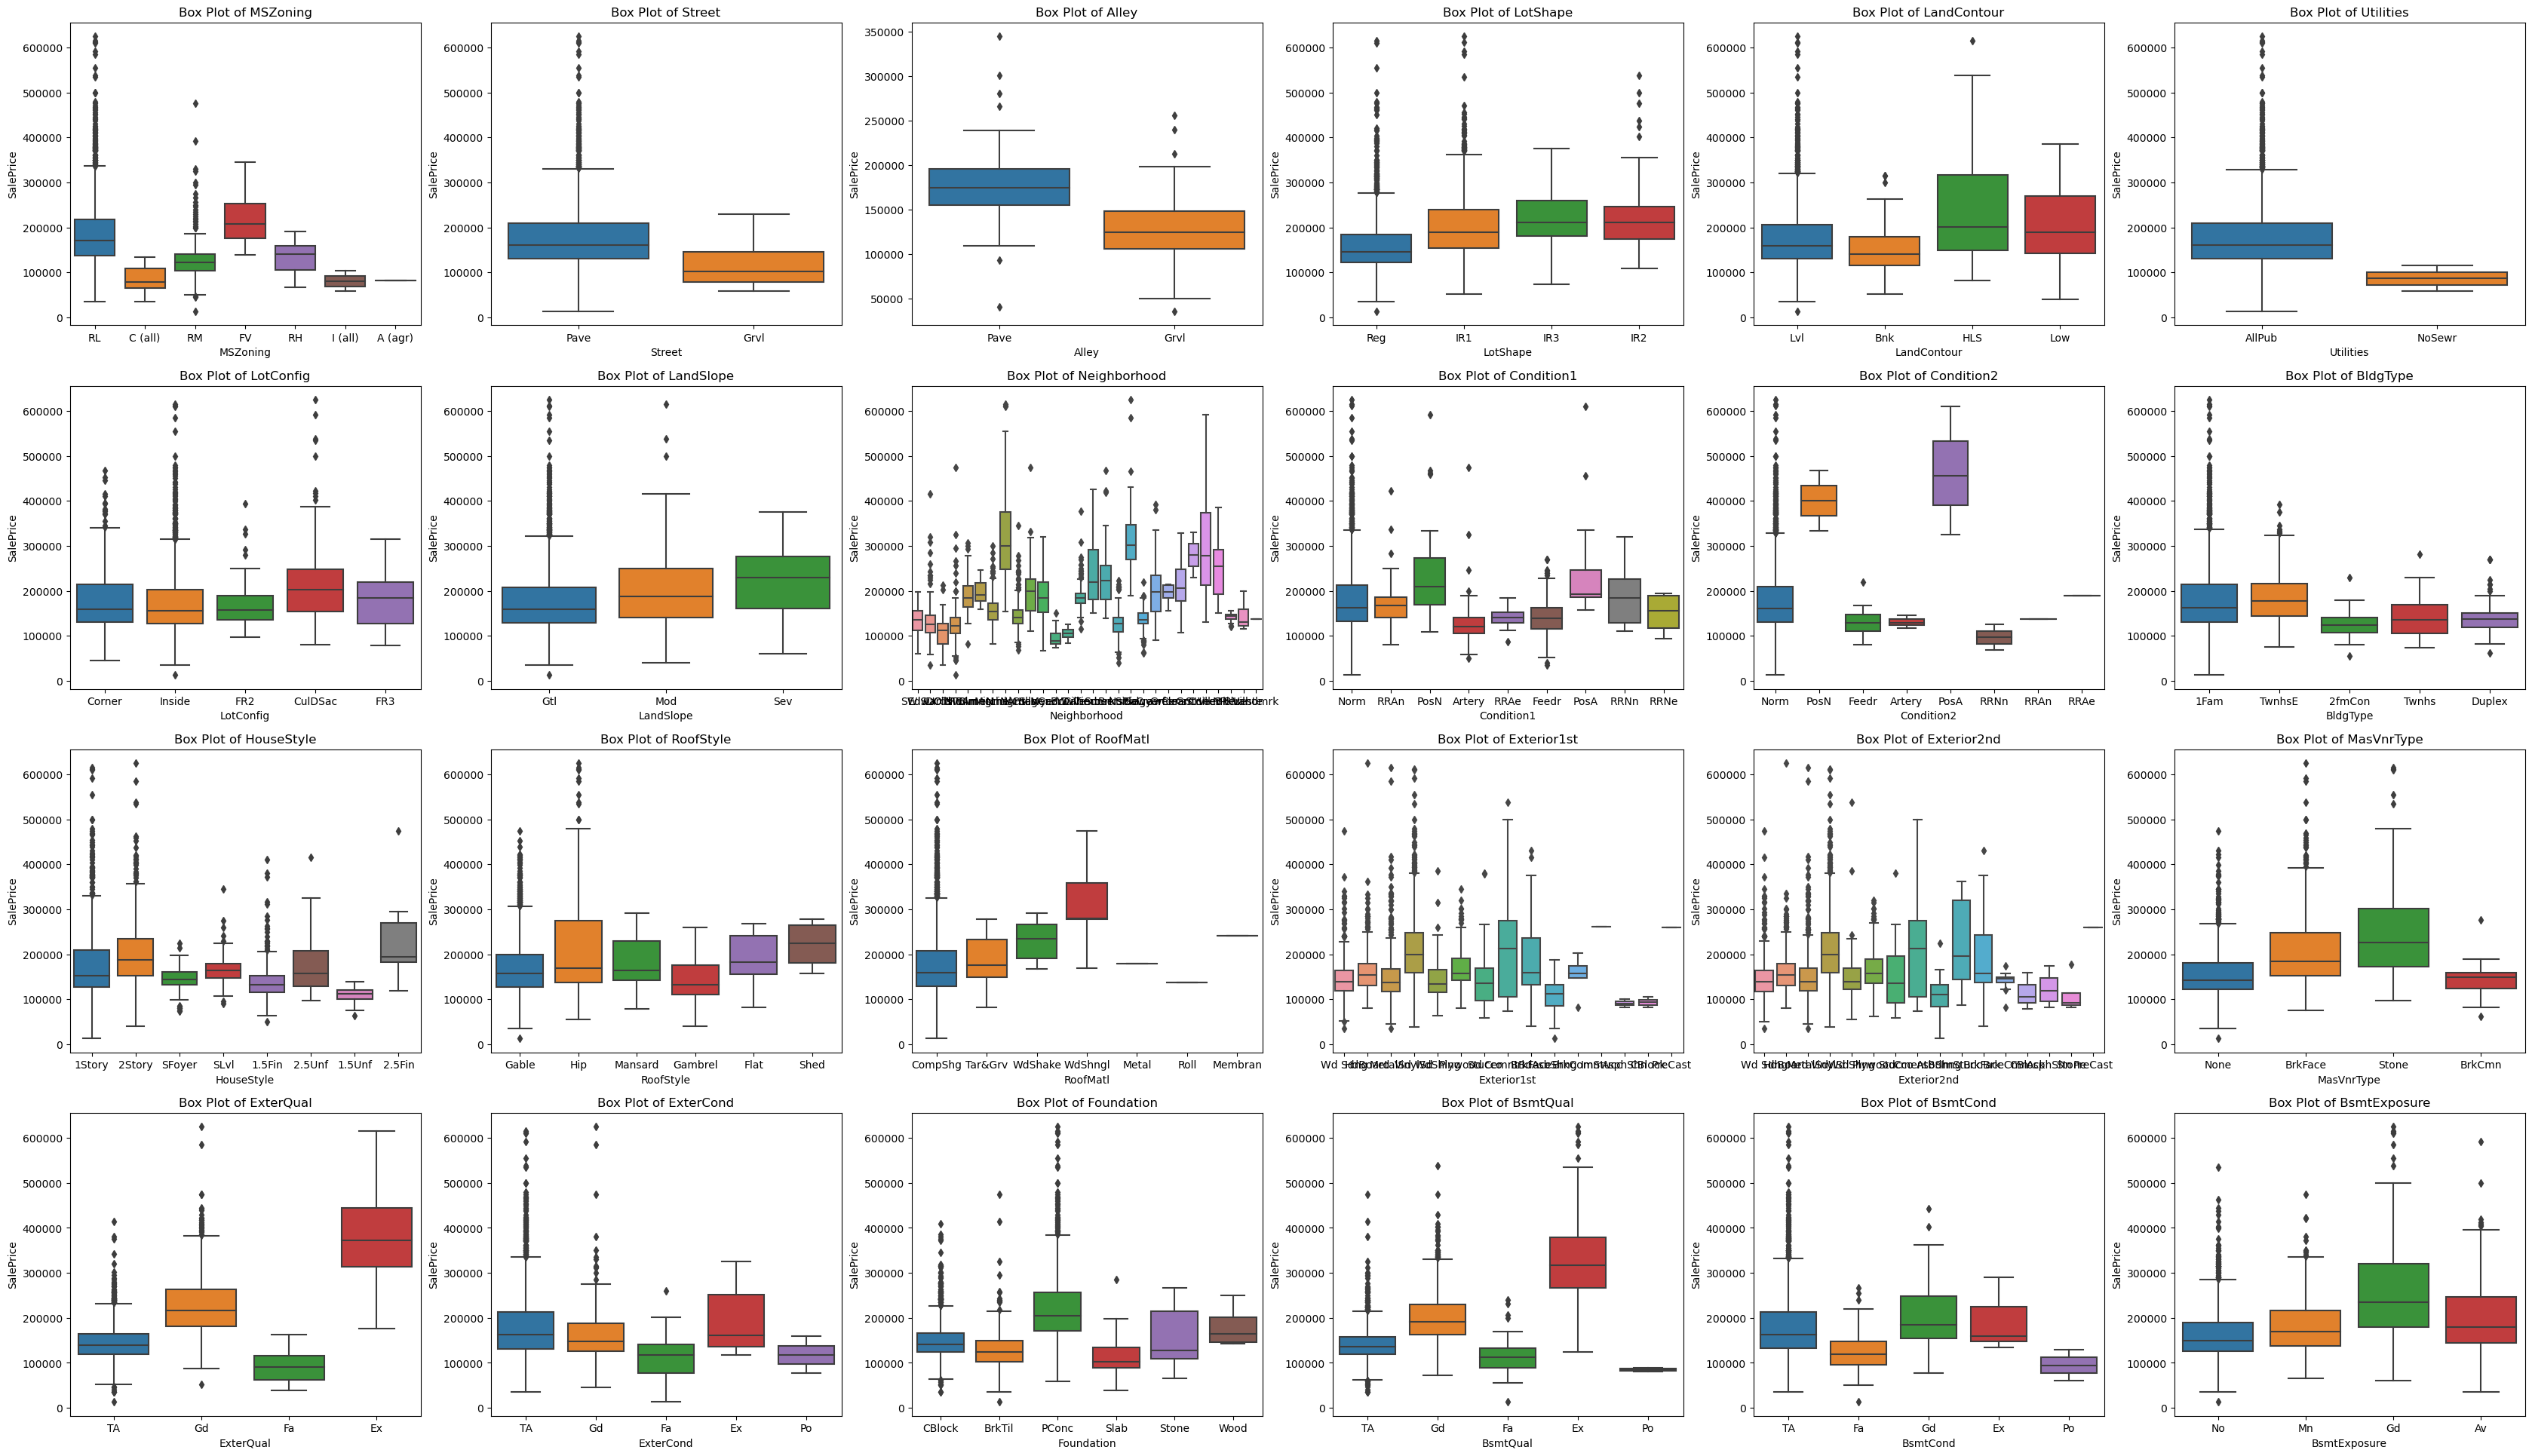

In [33]:
n_cols = 6
n_rows = math.ceil(len(cat_cols_1.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))

if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it iterable

for i, column in enumerate(cat_cols_1):
    sns.boxplot(x=cat_cols_1[column],y = numerical_columns['SalePrice'], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

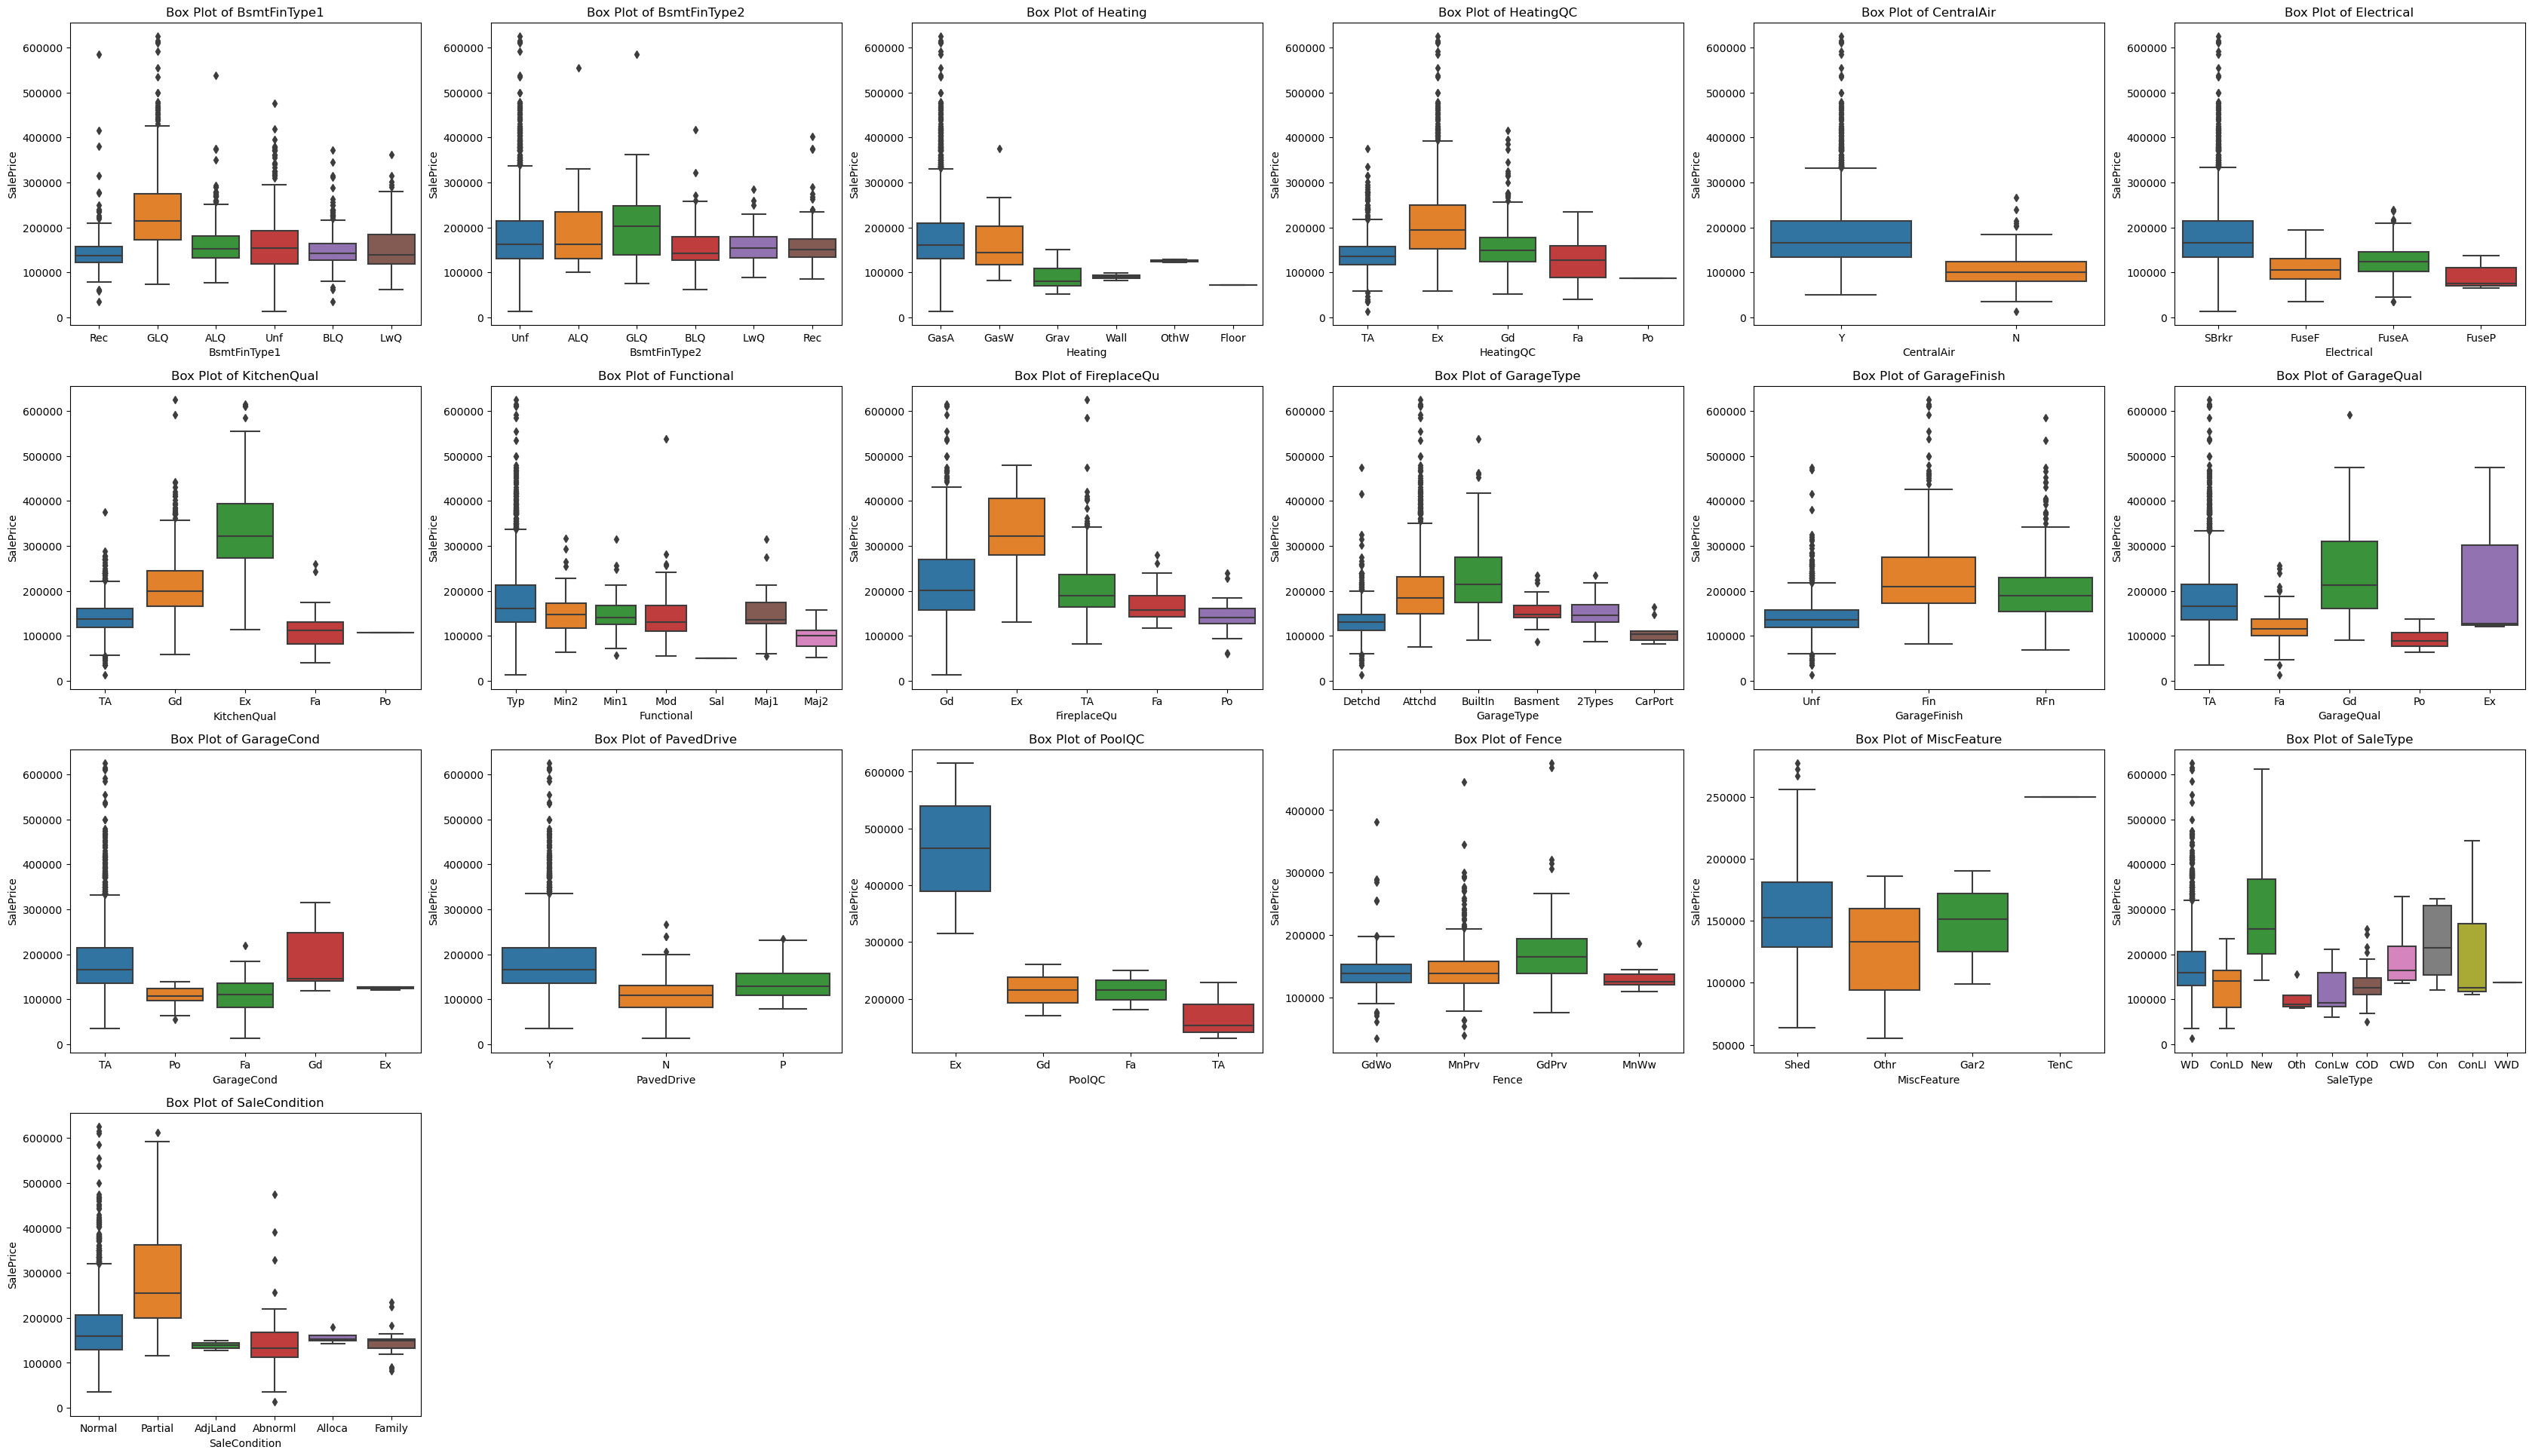

In [35]:
n_cols = 6
n_rows = math.ceil(len(cat_cols_2.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))

if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it iterable

for i, column in enumerate(cat_cols_2):
    sns.boxplot(x=cat_cols_2[column],y = numerical_columns['SalePrice'], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

# Time Series Analysis

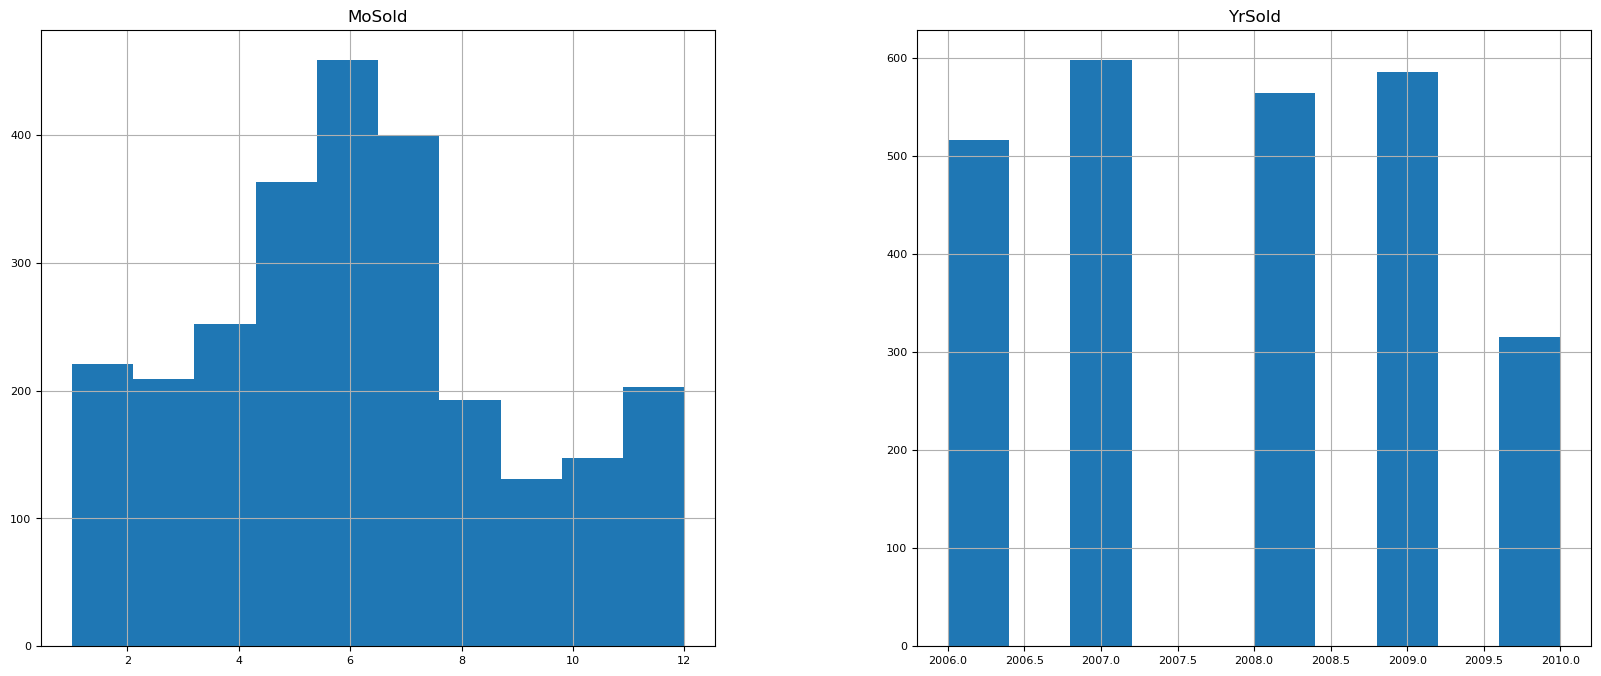

In [13]:
numerical_columns[['MoSold','YrSold']].hist(figsize=(20, 8), xlabelsize=8, ylabelsize=8);

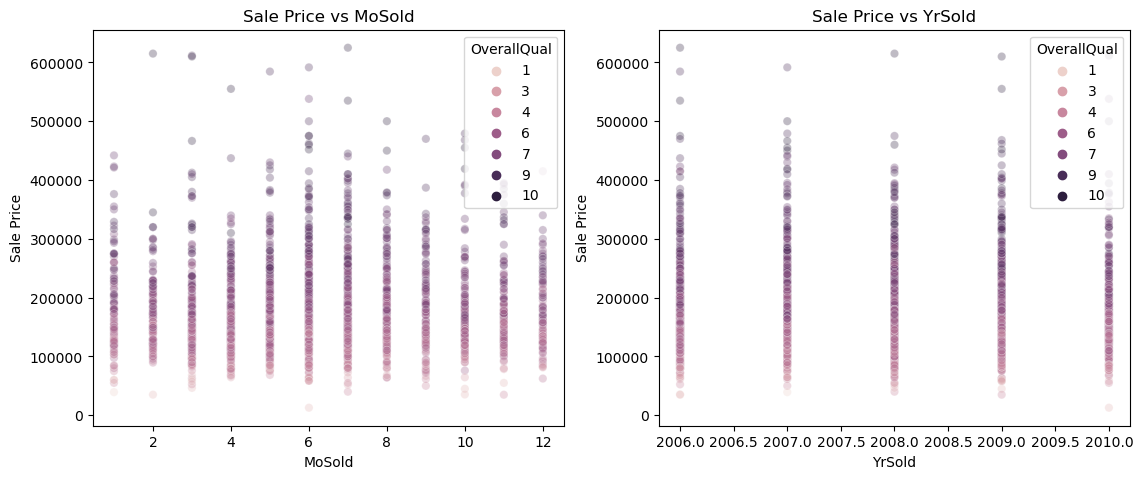

In [14]:
n_cols = 4
n_rows = math.ceil(len(cont_num_cols.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it iterable
for i, column in enumerate(numerical_columns[['MoSold','YrSold']].columns):
    sns.scatterplot(data=numerical_columns, x=column, y='SalePrice', ax=axes[i], alpha = 0.3, hue = 'OverallQual')
    axes[i].set_title(f'Sale Price vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sale Price')
    
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

In [15]:
# n_cols = 4
# n_rows = math.ceil(len(categorical_columns.columns) / n_cols)
# n_rows
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))

# if n_rows * n_cols > 1:
#     axes = axes.flatten()
# else:
#     axes = [axes]  # Make it iterable

# for i, column in enumerate(categorical_columns):
#     sns.boxplot(x=categorical_columns[column],y = numerical_columns['SalePrice'], ax=axes[i])
#     axes[i].set_title(f'Box Plot of {column}')
    
# for j in range(i + 1, n_rows * n_cols):
#     axes[j].set_visible(False)

# Looking at Numerical Column Missing Values

<Axes: >

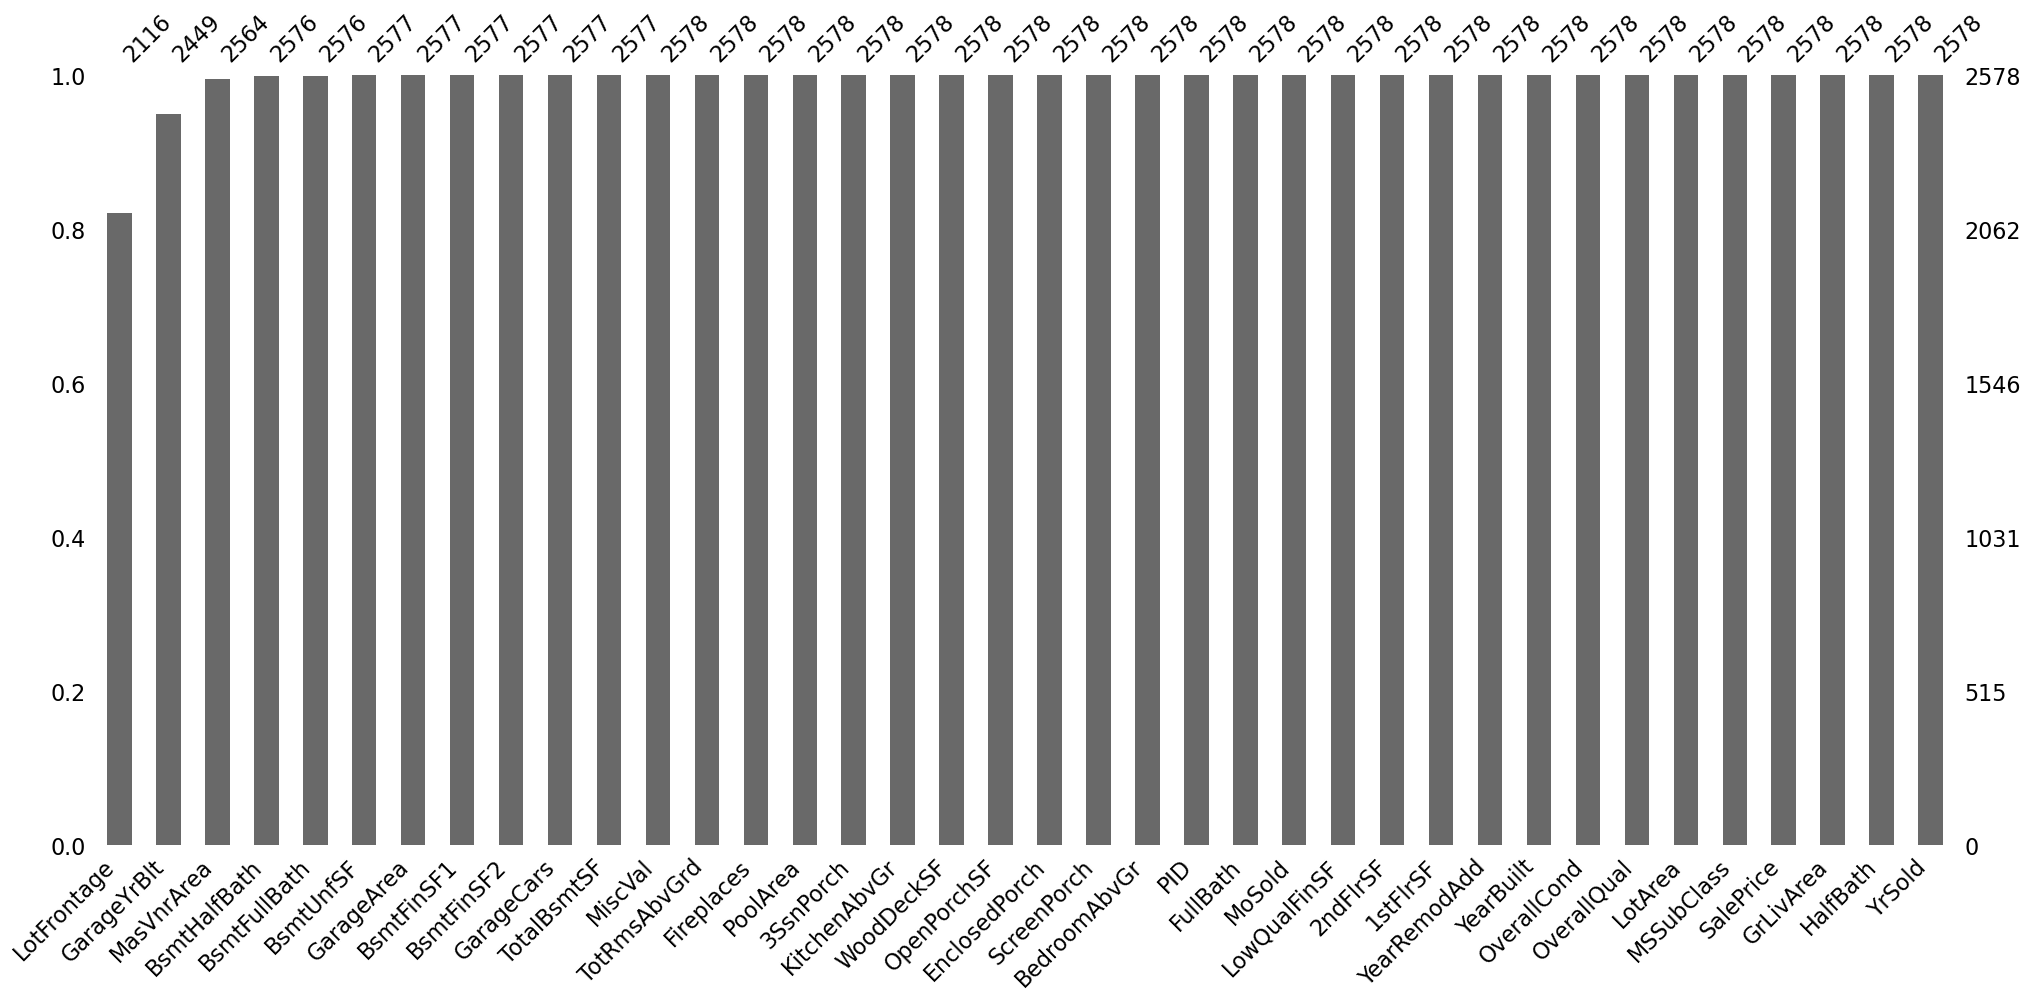

In [16]:
msno.bar(numerical_columns, sort = 'ascending')

# Looking at Categorical Variable Missing Values

<Axes: >

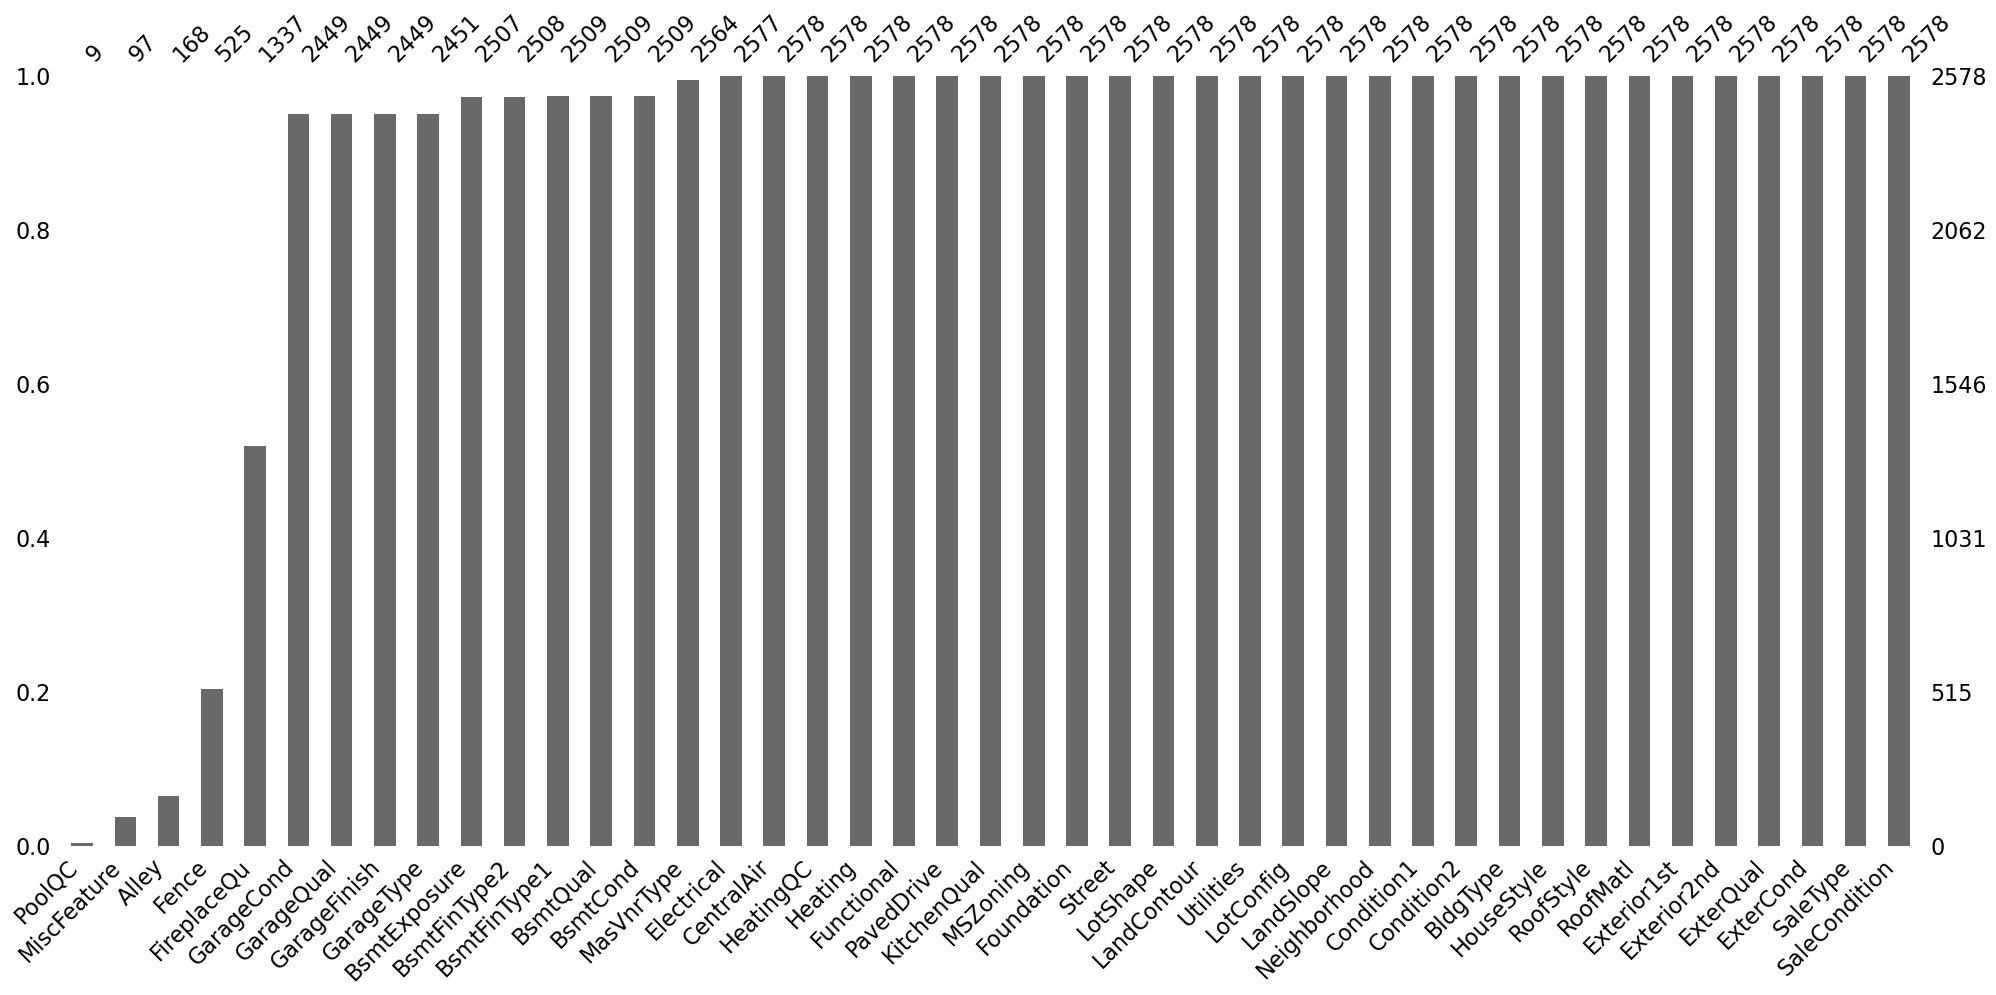

In [17]:
msno.bar(categorical_columns, sort = 'ascending')

# Missing at Random

After looking at the data dictionary, it seems that values are missing not at random. Missing values mean that the property itself does not contain the feature. When the property does not contain the feature the categorical feature, the numerical features with correspondance will also be missing.